# 决策树回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

x=data
y=target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=233)

In [3]:
from sklearn.tree import DecisionTreeRegressor

reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [4]:
reg.score(x_test,y_test)

0.7175590012177745

In [5]:
reg.score(x_train,y_train)

1.0

# 绘制学习曲线

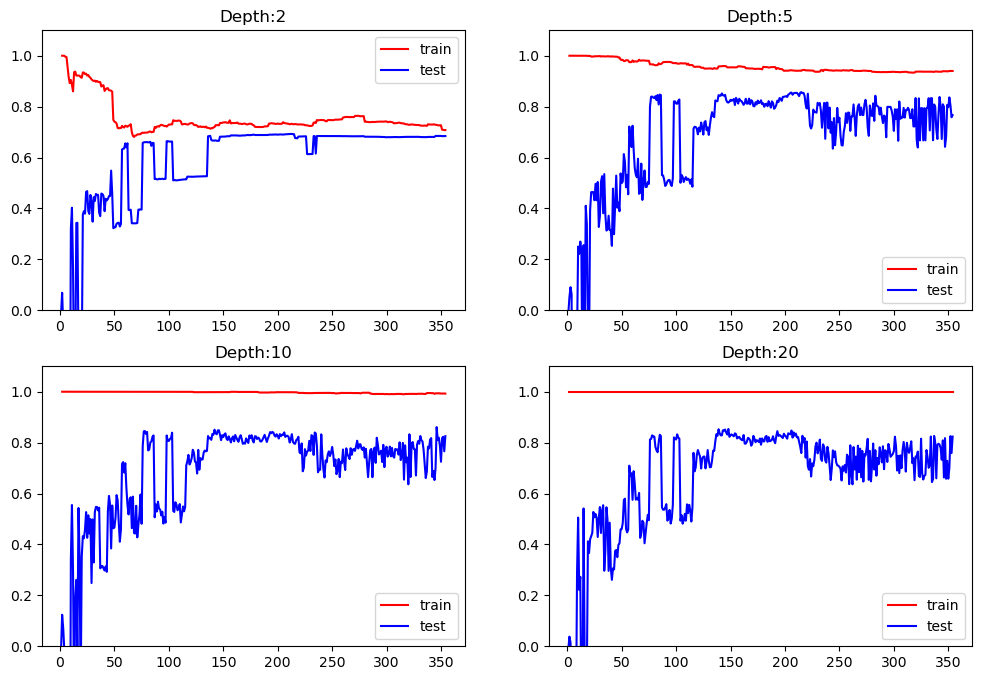

In [6]:
from sklearn.metrics import r2_score
plt.rcParams["figure.figsize"]=(12,8)
max_depth=[2,5,10,20]

for i,depth in enumerate(max_depth):
    reg=DecisionTreeRegressor(max_depth=depth)
    train_error,test_error=[],[]
    for k in range(len(x_train)):
        reg.fit(x_train[:k+1],y_train[:k+1])
        y_train_pred=reg.predict(x_train[:k+1])
        train_error.append(r2_score(y_train[:k+1],y_train_pred))
        
        y_test_pred=reg.predict(x_test)
        test_error.append(r2_score(y_test,y_test_pred))
        
    plt.subplot(2,2,i+1)
    plt.ylim(0,1.1)
    plt.title("Depth:{0}".format(depth))
    plt.plot([k+1 for k in range(len(x_train))],train_error,c='r',label='train')
    plt.plot([k+1 for k in range(len(x_train))],test_error,c='b',label='test')
    plt.legend()
    
plt.show()

# 网格搜索寻找最优超参数

In [7]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[n for n in range(2,15)],
    'min_samples_leaf':[sn for sn in range(3,20)],  
}

grid=GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    n_jobs=-1
)

In [8]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                              13, 14, 15, 16, 17, 18, 19]})

In [9]:
grid.best_params_

{'max_depth': 8, 'min_samples_leaf': 9}

In [10]:
grid.best_score_

0.7348347167600087

In [11]:
reg=grid.best_estimator_

In [12]:
reg.score(x_test,y_test)

0.7322123611721101